In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

In [105]:
X_data = []
Y_data = []
for i in range(400):
    x_point = np.random.randint(-10, 10, 2)
    X_data.append(x_point)
    Y_data.append(np.ones(1))
for i in range(400):
    x_point = np.random.randint(50, 90, 2)
    X_data.append(x_point)
    Y_data.append(np.zeros(1))

In [106]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [107]:
X_data

array([[ 0,  7],
       [-7,  0],
       [-1, -6],
       ...,
       [76, 58],
       [76, 55],
       [56, 86]])

In [108]:
Y_data

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [109]:
X_data.shape, Y_data.shape

((800, 2), (800, 1))

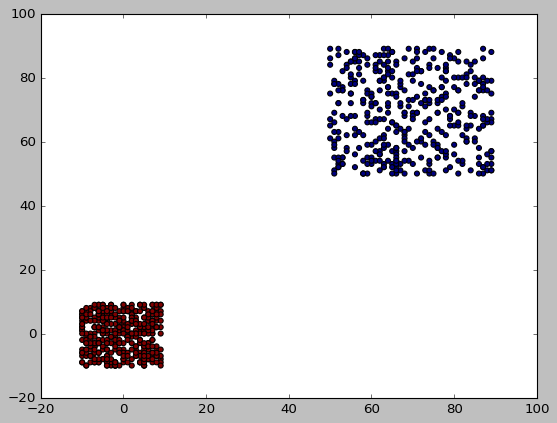

In [110]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data.reshape(-1))

In [111]:
from sklearn.utils import shuffle
X_data, Y_data = shuffle(X_data, Y_data, random_state=0)

In [113]:
size = 0.8
X_train, Y_train = X_data[:int(X_data.shape[0]*size)], Y_data[:int(Y_data.shape[0]*size)]
X_test, Y_test = X_data[int(X_data.shape[0]*size):], Y_data[int(Y_data.shape[0]*size):]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(640, 2) (640, 1) (160, 2) (160, 1)


In [114]:
def distance_formula(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [115]:
distance_formula(X_data[0], X_data[1]), distance_formula(X_data[0], X_data[2])

(71.58910531638176, 12.041594578792296)

In [131]:
class KNN_classifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    def distance_formula(self, p1, p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

    def predict(self, p):
        distances = []

        for i in range(len(self.X)):
            distances.append((self.distance_formula(self.X[i], p), i))

        distances = sorted(distances, key = lambda x: x[0])
        distance_points = distances[:self.k]

        classes = []

        for dist, i in distance_points:
            classes.append(self.Y[i])

        class_point, count = np.unique(classes, return_counts = True)

        idx = np.argmax(count)

        pred = {'Class': class_point[idx], 'Prob': np.max(count)/np.sum(count)}

        return pred

In [132]:
knn_model = KNN_classifier(5)

In [133]:
knn_model.fit(X_train, Y_train)

In [134]:
knn_model.predict(X_data[0])

{'Class': 1.0, 'Prob': 1.0}

In [194]:
Y_pred = []
for i in range(X_test.shape[0]):
    pred = knn_model.predict(X_test[i])
    print(pred, Y_test[i])
    Y_pred.append(pred['Class'])
Y_pred = np.array(Y_pred)

{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 0.0, 'Prob': 1.0} [0.]
{'Class': 1.0, 'Prob': 1.0} [1.]
{'Class': 

In [195]:
Y_pred = np.array([Y_pred]).reshape(-1, 1)

In [196]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [197]:
accuracy(Y_pred, Y_test)

1.0
